# Pepper Spiciness Prediction

Group 12: Le Uyen Nhu Dinh, Sheikh Hasan Elahi, Isma Sohail

In [149]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


### Reading data

In [150]:
df = pd.read_csv('train.csv')
df

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,red,Midday,8.68,5-6,0.00
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,green,Midday,22.44,NaN,0.00
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,red,Midday,24.99,NaN,455995.06
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,yellow,Midday,13.05,NaN,0.00
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,red,Midday,27.08,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.67,6.51,19.00,2.87,1.53,0.63,9.02,0.63,95.54,4.86,yellow,Evening,16.57,NaN,88266.90
996,17.17,9.25,150.86,1.41,386.87,2.27,268.93,2.21,131.71,2.59,yellow,Morning,22.39,NaN,0.00
997,14.16,6.87,124.72,1.97,202.83,3.31,203.84,2.90,114.42,3.17,yellow,Evening,15.84,7-8,0.00
998,3.71,7.12,29.53,1.05,115.61,9.80,45.95,2.39,97.70,4.01,green,Evening,16.05,NaN,188390.86


In [151]:
# Categorical data
df.select_dtypes(include='object')

,color,Harvest Time,Average Temperature During Storage (celcius)
0,red,Midday,5-6
1,green,Midday,NaN
2,red,Midday,NaN
3,yellow,Midday,NaN
4,red,Midday,NaN
...,...,...,...
995,yellow,Evening,NaN
996,yellow,Morning,NaN
997,yellow,Evening,7-8
998,green,Evening,NaN


In [152]:
# Statistical summary on nummeric data
df.describe()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,Average Daily Temperature During Growth (celcius),Scoville Heat Units (SHU)
count,999.000000,999.000000,999.000000,998.000000,999.000000,999.000000,1000.000000,999.000000,1000.000000,999.000000,1000.000000,1000.000000
mean,15.574675,6.641572,169.346406,4.619499,128.731301,4.215385,142.035180,3.283534,90.878380,3.679179,19.641960,70941.260020
std,6.267303,2.139023,123.779026,2.829503,87.270366,3.163125,72.246142,1.938264,18.724314,1.034726,6.436255,108149.917069
min,0.300000,0.100000,0.560000,0.000000,0.040000,0.010000,0.950000,0.010000,31.400000,0.850000,0.840000,0.000000
25%,11.290000,5.140000,79.020000,2.400000,55.390000,1.710000,92.290000,1.865000,78.585000,2.980000,15.397500,0.000000
50%,15.520000,6.600000,147.230000,4.280000,119.490000,3.590000,141.730000,3.140000,89.690000,3.660000,19.495000,0.000000
75%,19.900000,8.045000,227.625000,6.560000,186.845000,6.115000,192.720000,4.555000,103.200000,4.375000,23.530000,121349.617500
max,35.570000,13.620000,869.970000,14.630000,487.260000,19.020000,450.290000,9.360000,158.300000,8.250000,40.700000,527639.860000


In [153]:
# Statistical summary on categoric data
df.describe(include=['O'])

,color,Harvest Time,Average Temperature During Storage (celcius)
count,999,1000,352
unique,3,3,6
top,yellow,Midday,7-8
freq,351,605,93


In [154]:
# Check missing data
df.isna().sum()

Length (cm)                                            1
Width (cm)                                             1
Weight (g)                                             1
Pericarp Thickness (mm)                                2
Seed Count                                             1
Capsaicin Content                                      1
Vitamin C Content (mg)                                 0
Sugar Content                                          1
Moisture Content                                       0
Firmness                                               1
color                                                  1
Harvest Time                                           0
Average Daily Temperature During Growth (celcius)      0
Average Temperature During Storage (celcius)         648
Scoville Heat Units (SHU)                              0
dtype: int64

**Comment**: Most of the features have 1 to 2 missing values while 'Average Temperature During Storage (celcius)' has 648 missing, while train data have 1000 samples totally. This amount is quite significant, which could be better to remove the feature.

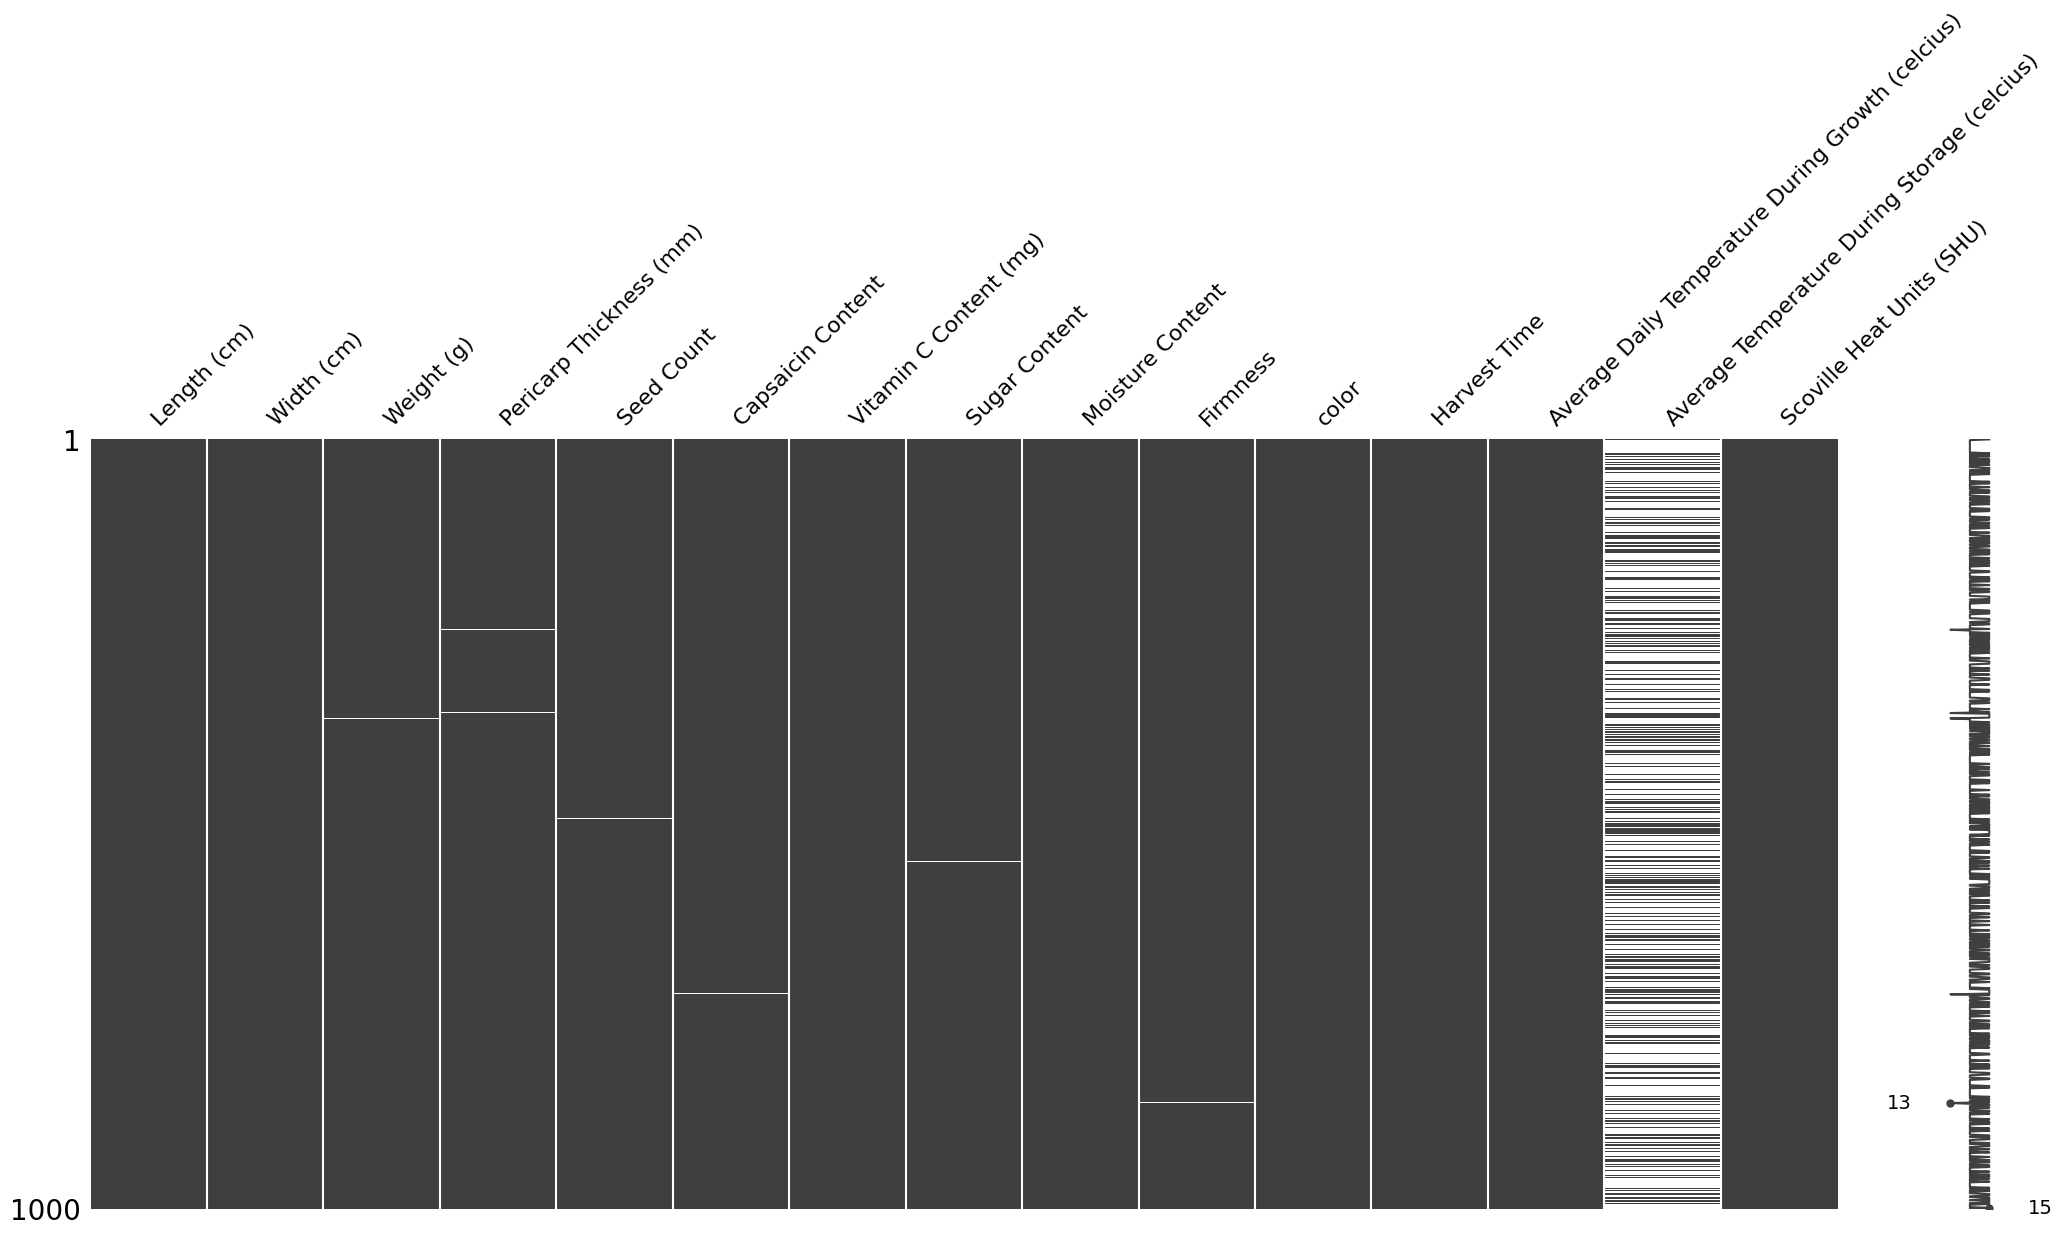

In [155]:
# Check location of the missing values:
import missingno as msno
msno.matrix(df)
plt.show()

In [156]:
# Check duplicates:
df.duplicated().any()

np.False_

/var/folders/tb/4p7pqq7j23n681mj_tfj2wl40000gn/T/ipykernel_1601/435218730.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('RdYlGn_r', num_bins)


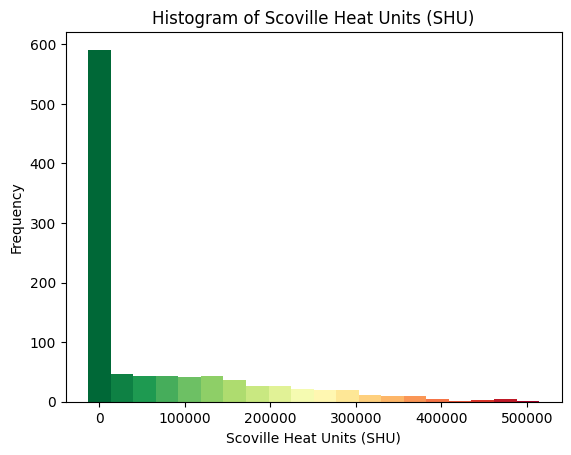

In [157]:
# Distribution of target:

# Histogram data
num_bins = 20
counts, bins = np.histogram(df['Scoville Heat Units (SHU)'], bins=num_bins)

# Colormap from green to red
cmap = get_cmap('RdYlGn_r', num_bins)

# Plot histogram with colored bins
for i in range(num_bins):
    plt.bar(bins[i], counts[i], width=bins[i+1]-bins[i], color=cmap(i))

plt.title("Histogram of Scoville Heat Units (SHU)")
plt.xlabel("Scoville Heat Units (SHU)")
plt.ylabel("Frequency")
plt.show()

**Comment**: Almost 600 samples have 0 as Scoville Heat Score, and the rest of 400 samples are distributes quite evenly to other values. The higher the values the fewer samples are found.

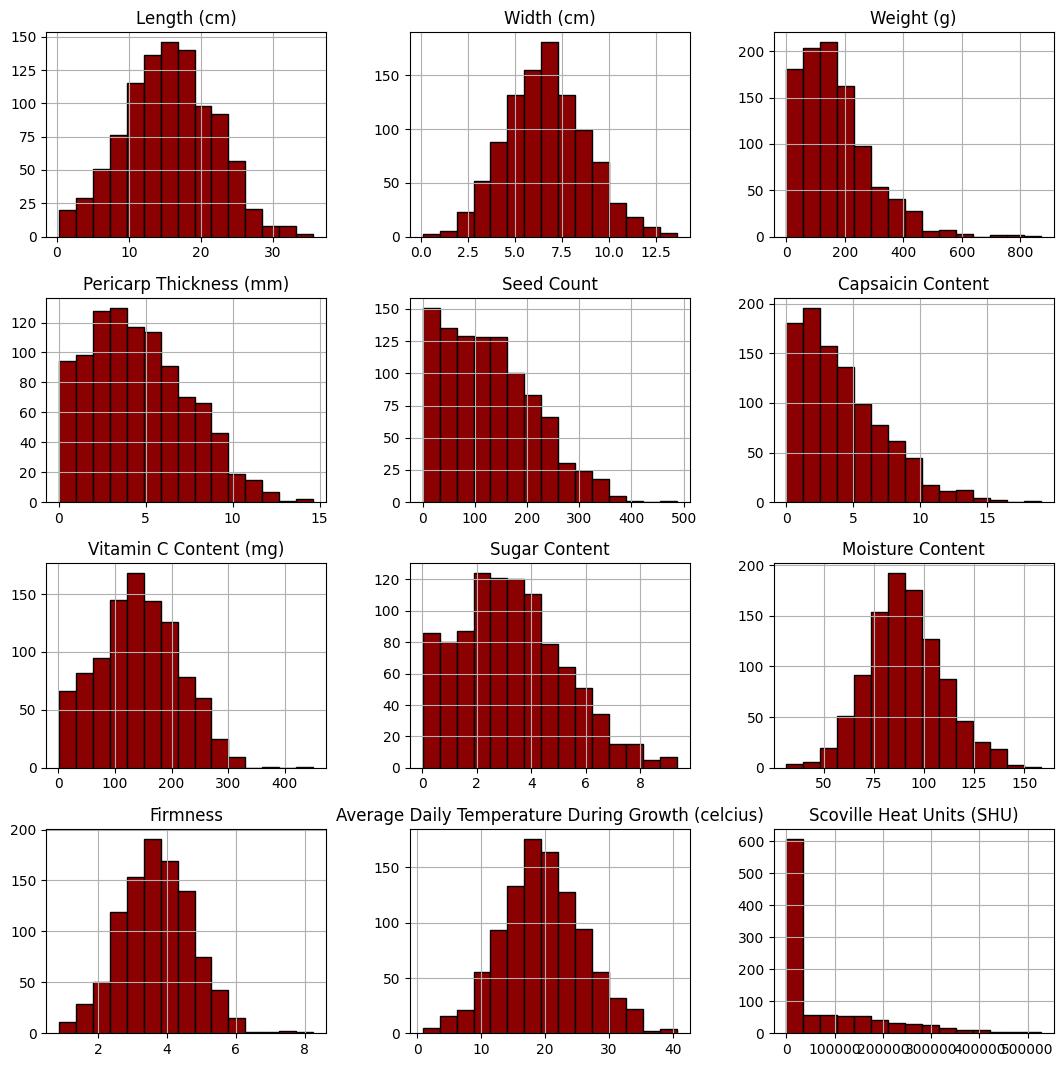

In [158]:
# Histograms of features:
df.hist(figsize=(13,13), 
        bins = 15, color = 'darkred',
        edgecolor='black')

plt.show()

**Comment**: The five features that show Guassian distribution are 'Length', 'Width', 'Moisture Content', 'Firmness' and 'Average Daily Temperature During Growth'. The rest are skewed to the left. 

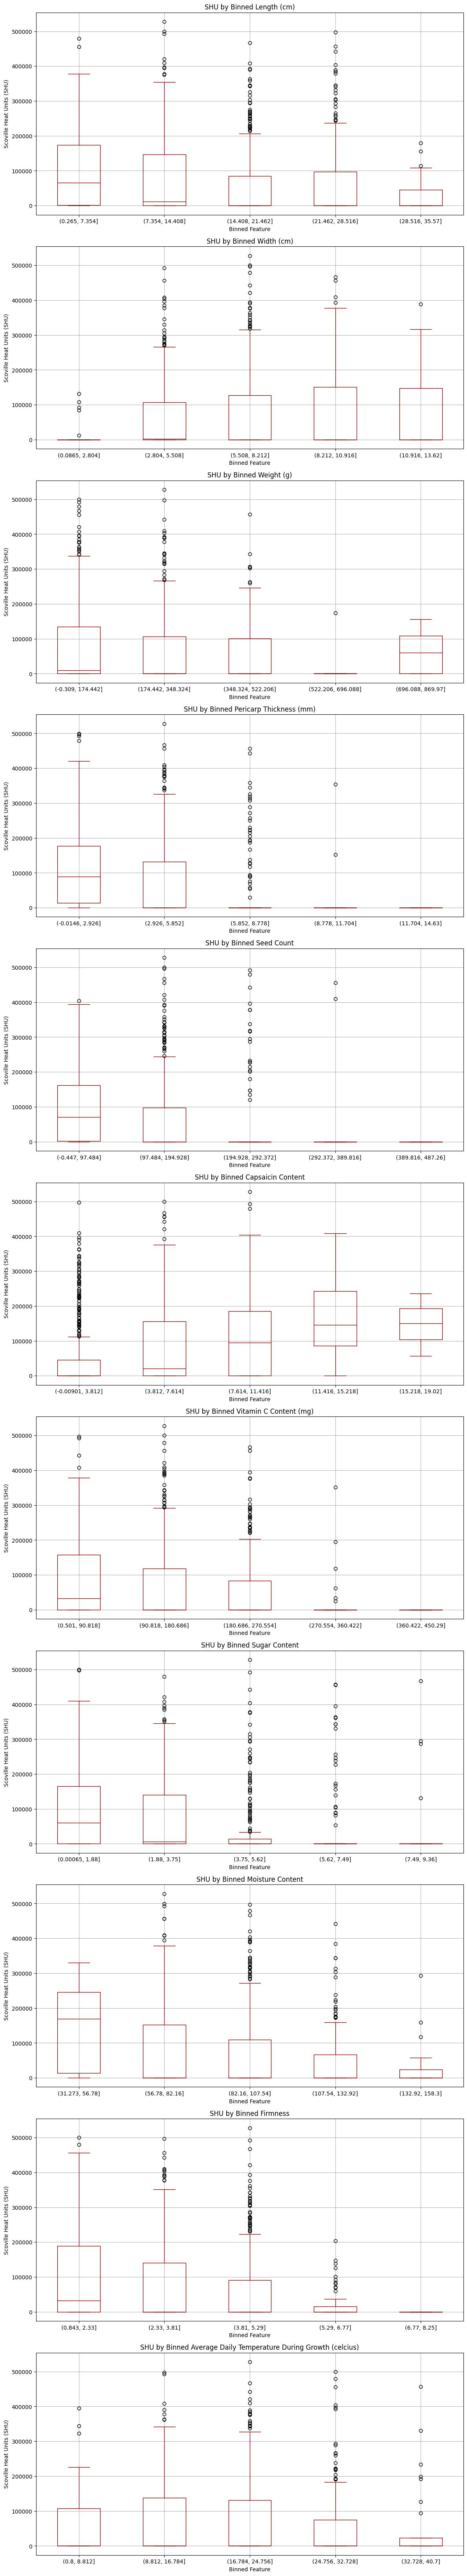

In [159]:

# Get numeric features (excluding target)
features = df.select_dtypes(include='number').columns.drop('Scoville Heat Units (SHU)')

# Setup subplots
fig, axes = plt.subplots(nrows=len(features), figsize=(12, 6 * len(features)))

# If only one axis, make it iterable
if len(features) == 1:
    axes = [axes]

# Plot boxplots
for i, feature in enumerate(features):
    # Bin the feature
    df['feature_bin'] = pd.cut(df[feature], bins=5)

    # Create boxplot on the subplot axis
    df.boxplot(column='Scoville Heat Units (SHU)', by='feature_bin', ax=axes[i], color = 'darkred')
    axes[i].set_title(f'SHU by Binned {feature}')
    axes[i].set_xlabel('Binned Feature')
    axes[i].set_ylabel('Scoville Heat Units (SHU)')

# Final layout
plt.tight_layout()
plt.suptitle('')
plt.show()

**Comment**: It is uneasy to detect outliers from the dataset because nearly 60% has value of 0 and the remaining sample with higher Scoville Heat Units can be useful for the machine to learn the 'specical'/'real spicy' cases.

/var/folders/tb/4p7pqq7j23n681mj_tfj2wl40000gn/T/ipykernel_1601/3171844941.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('RdYlGn_r')  # Green (low) to Red (high)


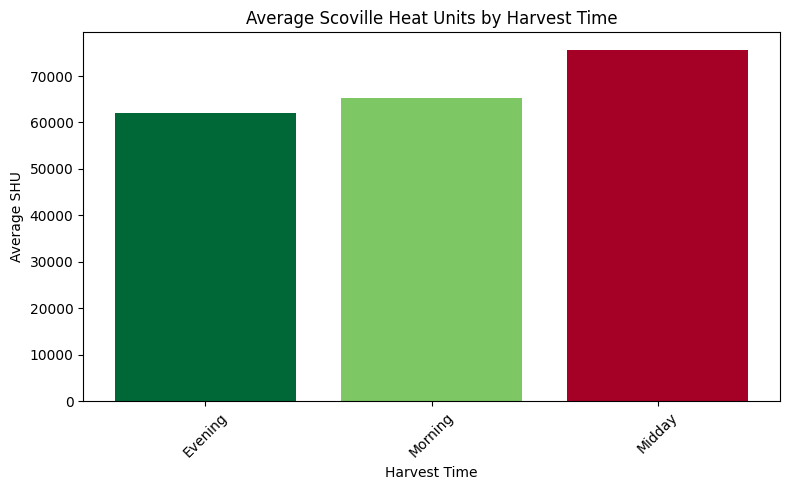

In [160]:
group1 = df.groupby('Harvest Time')['Scoville Heat Units (SHU)'].mean().sort_values()

# Normalize the SHU values for color mapping
norm1 = Normalize(vmin=group1.min(), vmax=group1.max())
cmap = get_cmap('RdYlGn_r')  # Green (low) to Red (high)
colors1 = [cmap(norm1(val)) for val in group1.values]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(group1.index, group1.values, color=colors1)
plt.xlabel('Harvest Time')
plt.ylabel('Average SHU')
plt.title('Average Scoville Heat Units by Harvest Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment**: If the chili is harvest during the midday, it is most probably spicier than others.

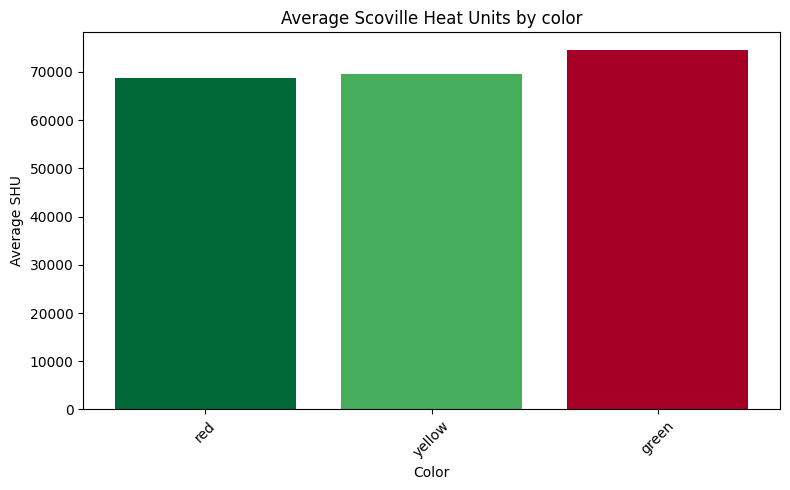

In [161]:
group2 = df.groupby('color')['Scoville Heat Units (SHU)'].mean().sort_values()

# Normalize the SHU values for color mapping
norm2 = Normalize(vmin=group2.min(), vmax=group2.max())
colors2 = [cmap(norm2(val)) for val in group2.values]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(group2.index, group2.values, color=colors2)
plt.xlabel('Color')
plt.ylabel('Average SHU')
plt.title('Average Scoville Heat Units by color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment**: It is hard to distinguish the spiciness by colors of red and yellow but the green ones are most probably spicier.

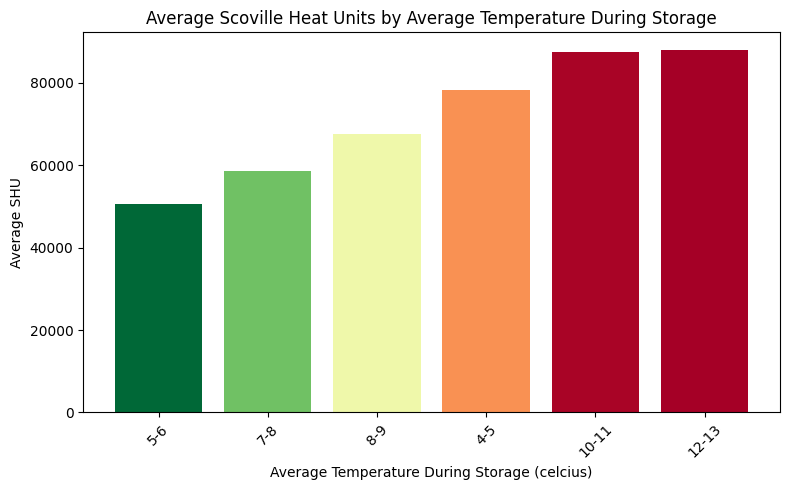

In [162]:
group3 = df.groupby('Average Temperature During Storage (celcius)')['Scoville Heat Units (SHU)'].mean().sort_values()

# Normalize the SHU values for color mapping
norm3 = Normalize(vmin=group3.min(), vmax=group3.max())
colors3 = [cmap(norm3(val)) for val in group3.values]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(group3.index, group3.values, color=colors3)
plt.xlabel('Average Temperature During Storage (celcius)')
plt.ylabel('Average SHU')
plt.title('Average Scoville Heat Units by Average Temperature During Storage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment**: The higher temperature the pepper are stored, the spicier they are.

In [163]:
# Check if the values of 'Average Temperature During Storage' are following order for imputation
for val in df['Average Temperature During Storage (celcius)']:
    print(val)

5-6
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
12-13
nan
7-8
nan
10-11
nan
nan
nan
10-11
nan
7-8
nan
5-6
nan
nan
8-9
nan
nan
nan
8-9
8-9
7-8
nan
5-6
nan
8-9
nan
5-6
nan
nan
nan
nan
nan
nan
nan
nan
nan
4-5
nan
10-11
nan
nan
nan
nan
7-8
nan
nan
nan
8-9
4-5
nan
5-6
nan
nan
nan
nan
12-13
7-8
nan
10-11
nan
nan
7-8
7-8
nan
nan
4-5
nan
nan
nan
nan
nan
12-13
8-9
nan
5-6
nan
nan
nan
nan
nan
nan
nan
5-6
7-8
nan
7-8
nan
nan
nan
7-8
8-9
nan
nan
5-6
nan
nan
8-9
nan
nan
nan
nan
nan
8-9
nan
nan
nan
8-9
12-13
5-6
nan
12-13
nan
nan
8-9
nan
8-9
7-8
nan
nan
5-6
7-8
nan
nan
nan
10-11
7-8
5-6
10-11
12-13
nan
8-9
nan
nan
nan
nan
8-9
nan
nan
10-11
nan
12-13
nan
5-6
nan
nan
7-8
nan
nan
nan
nan
nan
nan
12-13
5-6
nan
nan
nan
nan
nan
nan
4-5
nan
12-13
8-9
nan
8-9
nan
nan
nan
nan
4-5
nan
nan
nan
nan
5-6
nan
nan
7-8
5-6
nan
nan
nan
nan
nan
10-11
4-5
10-11
10-11
nan
4-5
7-8
nan
7-8
nan
nan
nan
nan
nan
nan
nan
nan
nan
12-13
7-8
nan
10-11
12-13
nan
nan
nan
nan
nan
nan
8-9
8-9
8-9
8-9
nan
nan


**Comment**: It seems that the values of this feature is not following any order, which is so hard to impute missing values properly even though it could be potensial useful.

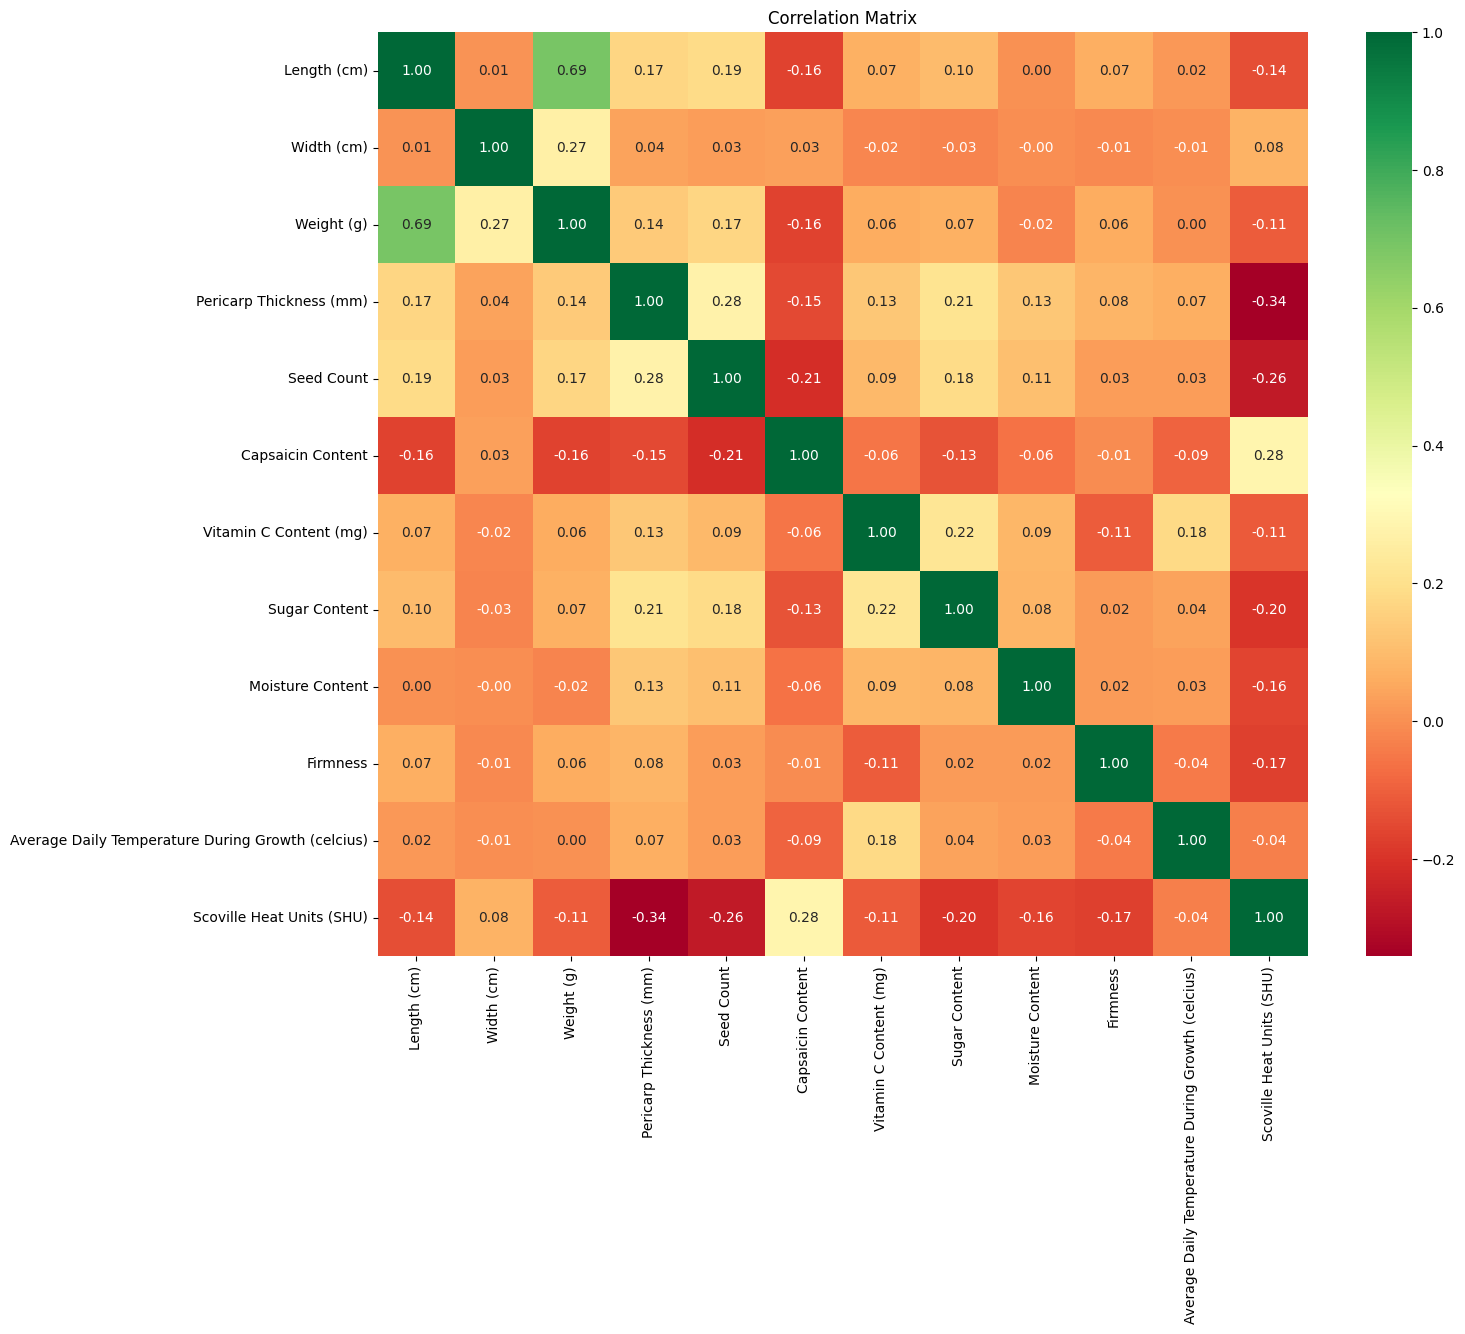

In [164]:
# Correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [167]:
# Preprocessing for using Regressor to extract feature importance:
df1 = df.copy()

# Drop columns:
cols_to_drop = ['feature_bin']
df1.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Handle missing values: Fill numeric columns with median, categorical with mode
for col in df1.columns:
    if df1[col].dtype == 'object' or df1[col].dtype.name == 'category':
        # Fill categorical with mode
        df1[col].fillna(df1[col].mode()[0])
    else:
        # Fill numeric with median
        df1[col] = df1[col].fillna(df1[col].median())


# Encode categorical features:
le_color = LabelEncoder()
le_harvest = LabelEncoder()
le_storage = LabelEncoder()

df1['color'] = le_color.fit_transform(df1['color'])
df1['Harvest Time'] = le_harvest.fit_transform(df1['Harvest Time'])
df1['Average Temperature During Storage (celcius)'] = le_storage.fit_transform(df1['Average Temperature During Storage (celcius)'])


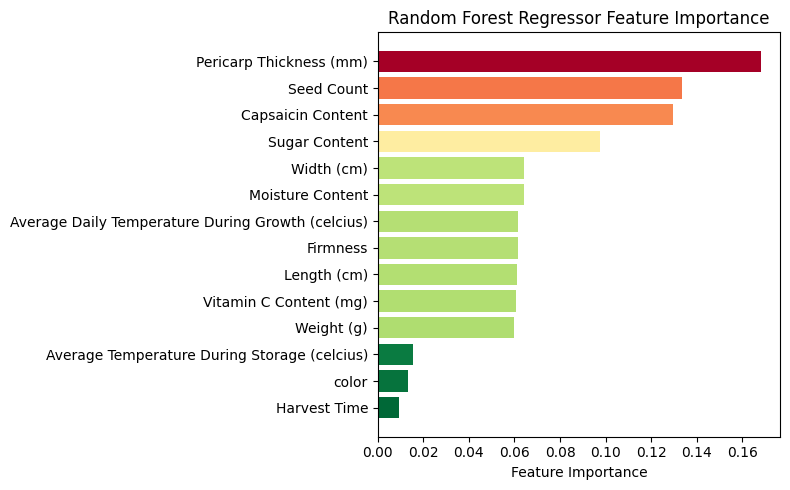

In [168]:
# Study feature importance:

# Split features and target
X = df1.drop('Scoville Heat Units (SHU)', axis=1)
y = df['Scoville Heat Units (SHU)']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Assume model and feature_names are already defined
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

# Normalize importances for coloring
norm = Normalize(vmin=importances.min(), vmax=importances.max())
colors = [cmap(norm(val)) for val in importances[sorted_idx]]

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], color=colors)
plt.xlabel("Feature Importance")
plt.title("Random Forest Regressor Feature Importance")
plt.tight_layout()
plt.show()

**Comment**: 

The top 4 are 'Pericarp Thickness', 'Seed Count', Capsaicin Content', and 'Sugar Content'. 

The three categorical features are the least importance. 

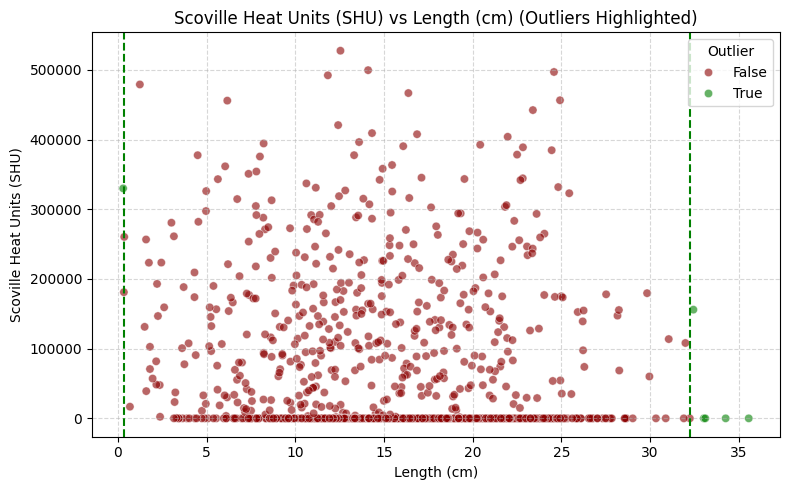

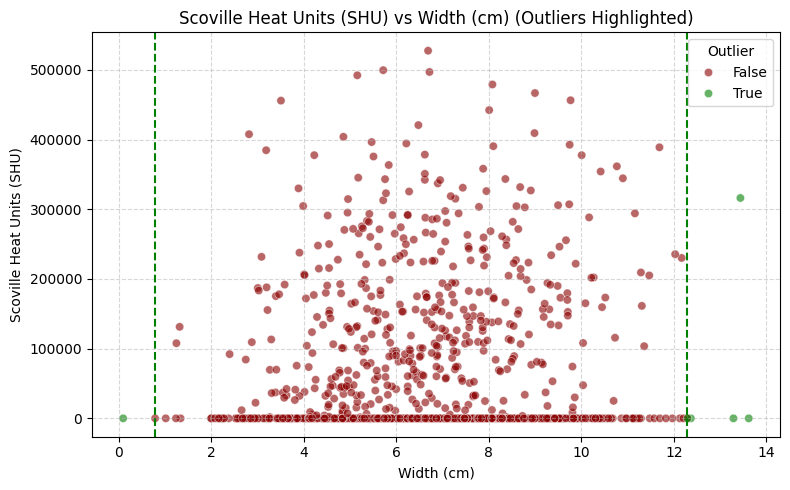

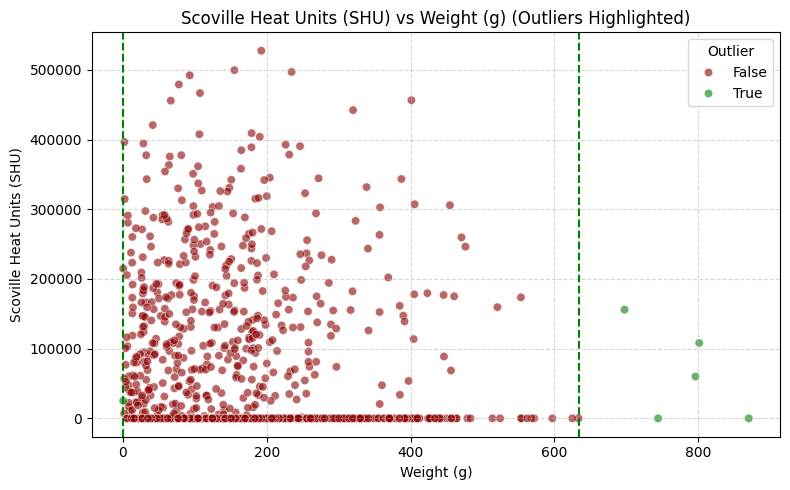

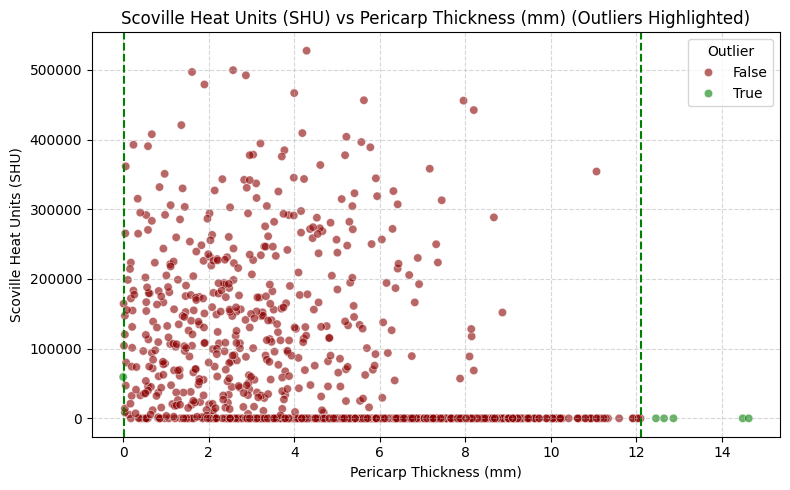

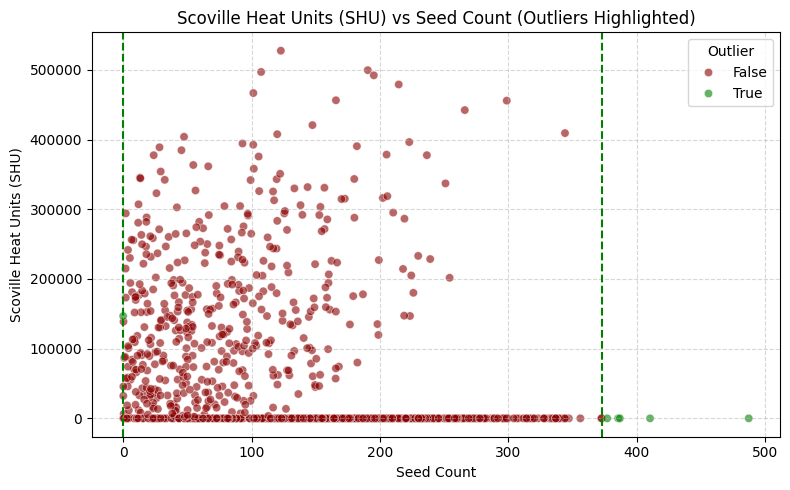

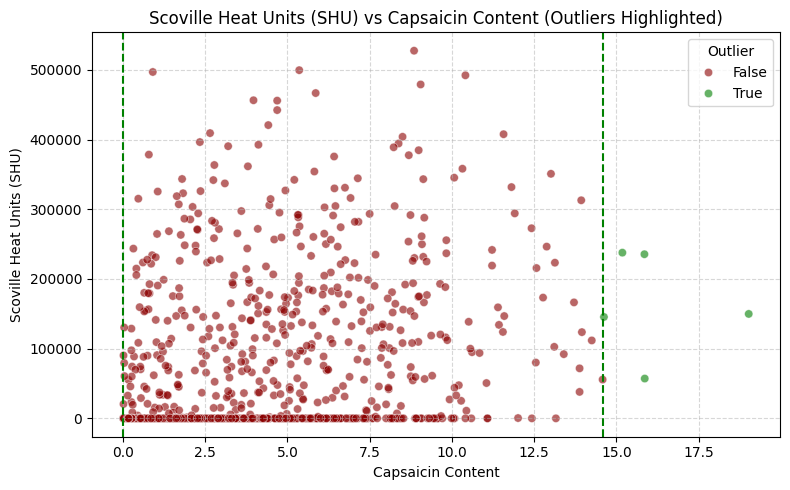

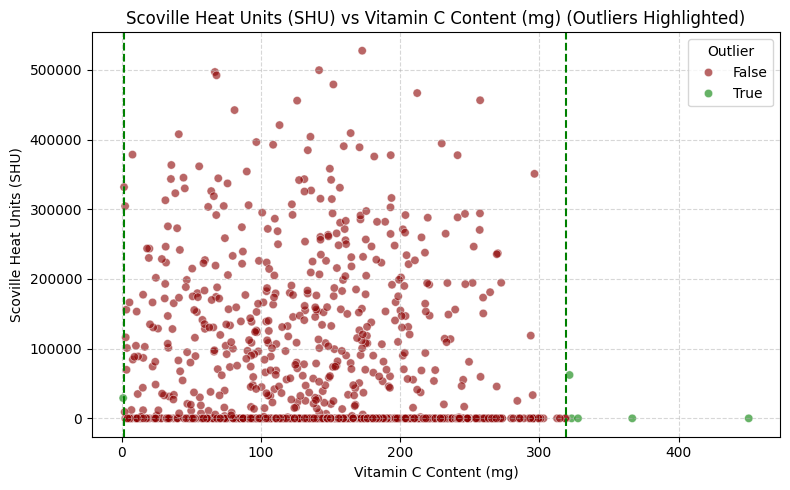

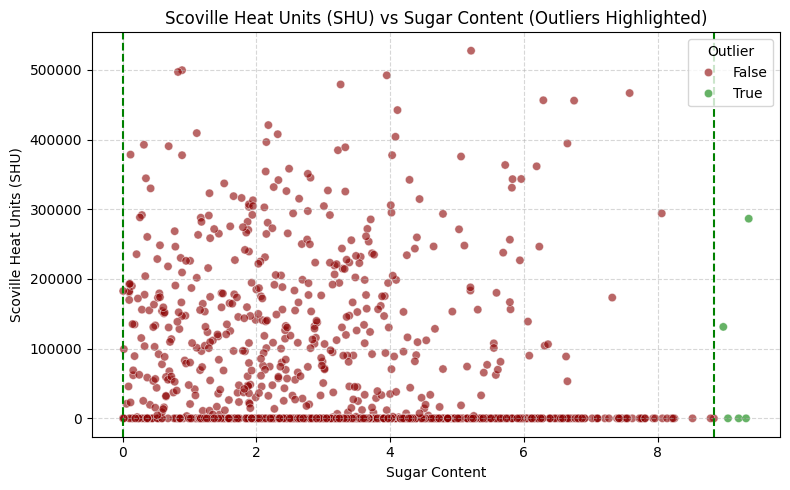

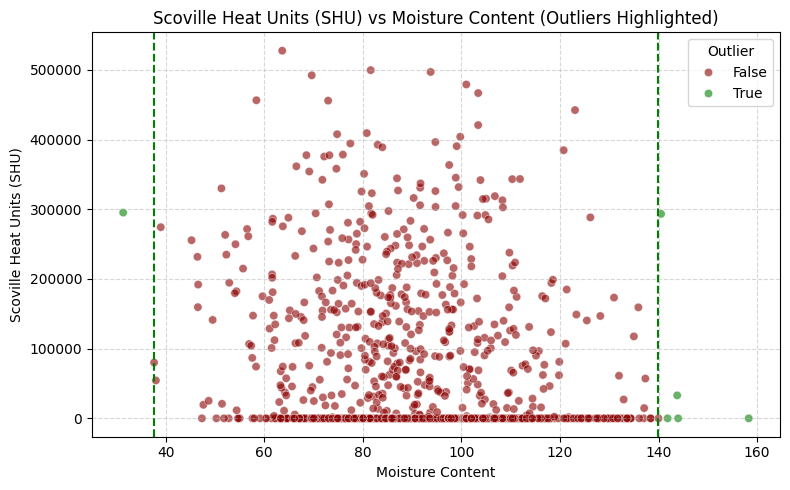

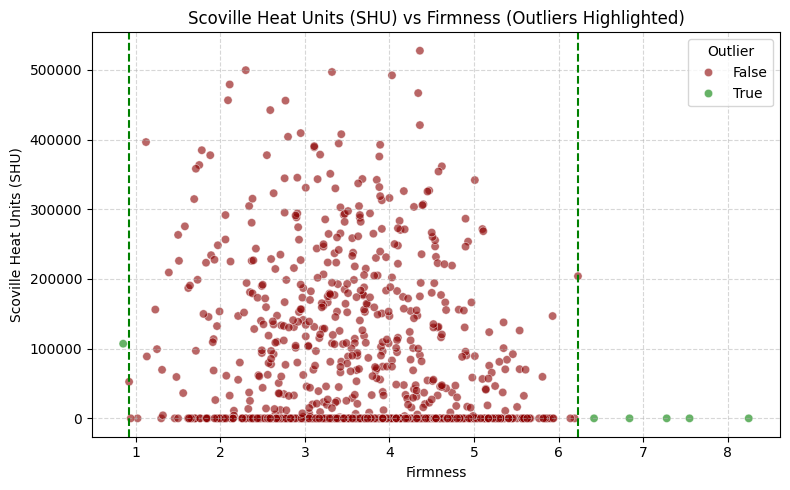

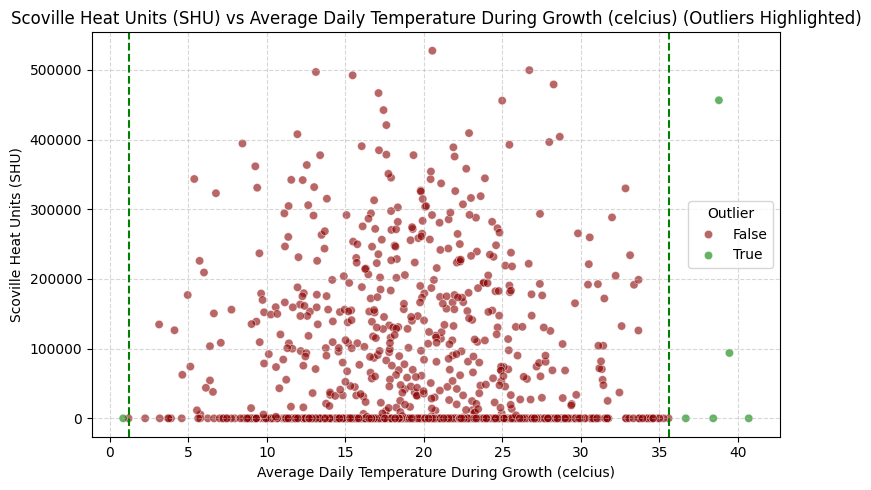

In [172]:
target_col = 'Scoville Heat Units (SHU)'

for col in df.select_dtypes(include='number').columns:
    if col != target_col:
        q99 = df[col].quantile(0.995)
        q01 = df[col].quantile(0.001)

        # Create an "Outlier" label
        df['Outlier'] = (df[col] > q99) | (df[col] < q01)

        plt.figure(figsize=(8, 5))
        sns.scatterplot(
            data=df,
            x=col,
            y=target_col,
            hue='Outlier',
            palette={False: 'darkred', True: 'green'},
            alpha=0.6
        )
        
        plt.axvline(q99, color='green', linestyle='--')
        plt.axvline(q01, color='green', linestyle='--')
        plt.title(f'{target_col} vs {col} (Outliers Highlighted)')
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

**For preprocessing**:

- Impute missing values with median of the feature because there are just 1 or 2 missing samples in the remaining feature.

- Remove outliers: below quantile(0.001) and above quantile(0.995) for each feature

--- For both test and train data ---

- Standardizing

- Drop three categorical features: 'color', 'Harvest Time' and 'Average Temperature During Storage (celsius)' because they scored the least in feature importance.

# PREPROCESSING

In [187]:
# Reimport the data
df_cleaned = pd.read_csv('train.csv')

num_features = df_cleaned.select_dtypes(include='number').drop('Scoville Heat Units (SHU)', axis = 1).columns

for col in num_features:
    # Impute missing values with median
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
    
    # Remove outliers
    q99 = df_cleaned[col].quantile(0.995)
    q01 = df_cleaned[col].quantile(0.001)

    # Filter rows — keep only values within the quantile range
    df_cleaned = df_cleaned[(df_cleaned[col] <= q99) & (df_cleaned[col] >= q01)]
    


In [188]:
DROP_COLS = ['color', 'Harvest Time', 'Average Temperature During Storage (celcius)']
drop_columns = FunctionTransformer(lambda df: df.drop(columns=DROP_COLS, axis = 1))

# Preprocessing pipeline
preprocessor = Pipeline([
    ('drop_cols', drop_columns),
    ('scaler', StandardScaler())
])

In [192]:
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

X_preprocessed = preprocessor.fit_transform(X)

preprocessed_df = pd.DataFrame(
    X_preprocessed,
    index=X.index,
    columns=[col for col in X.columns if col not in DROP_COLS]
)

preprocessed_df['Scoville Heat Units (SHU)'] = y

## VISUALIZATION AFTER CLEANING

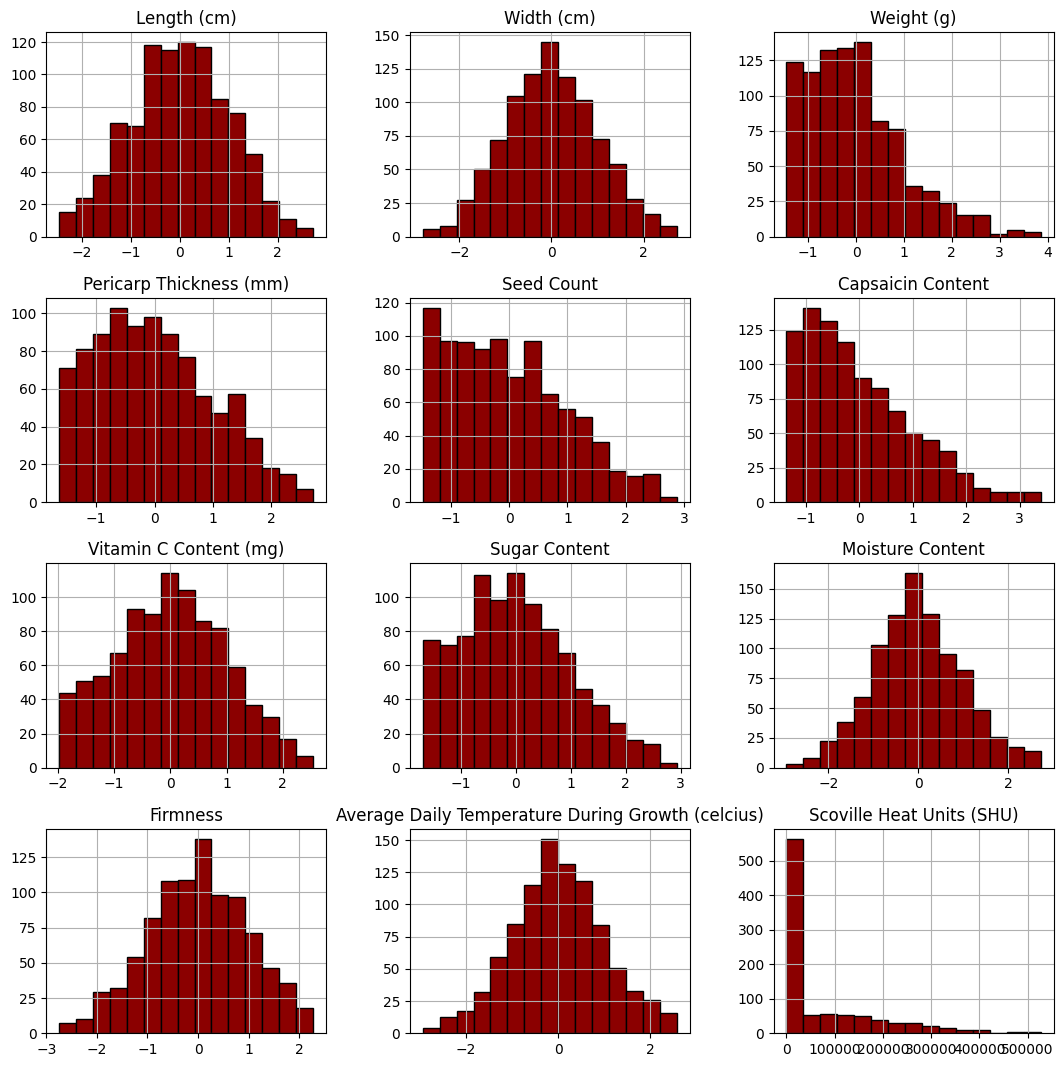

In [194]:
preprocessed_df.hist(figsize=(13,13), 
        bins = 15, color = 'darkred',
        edgecolor='black')

plt.show()

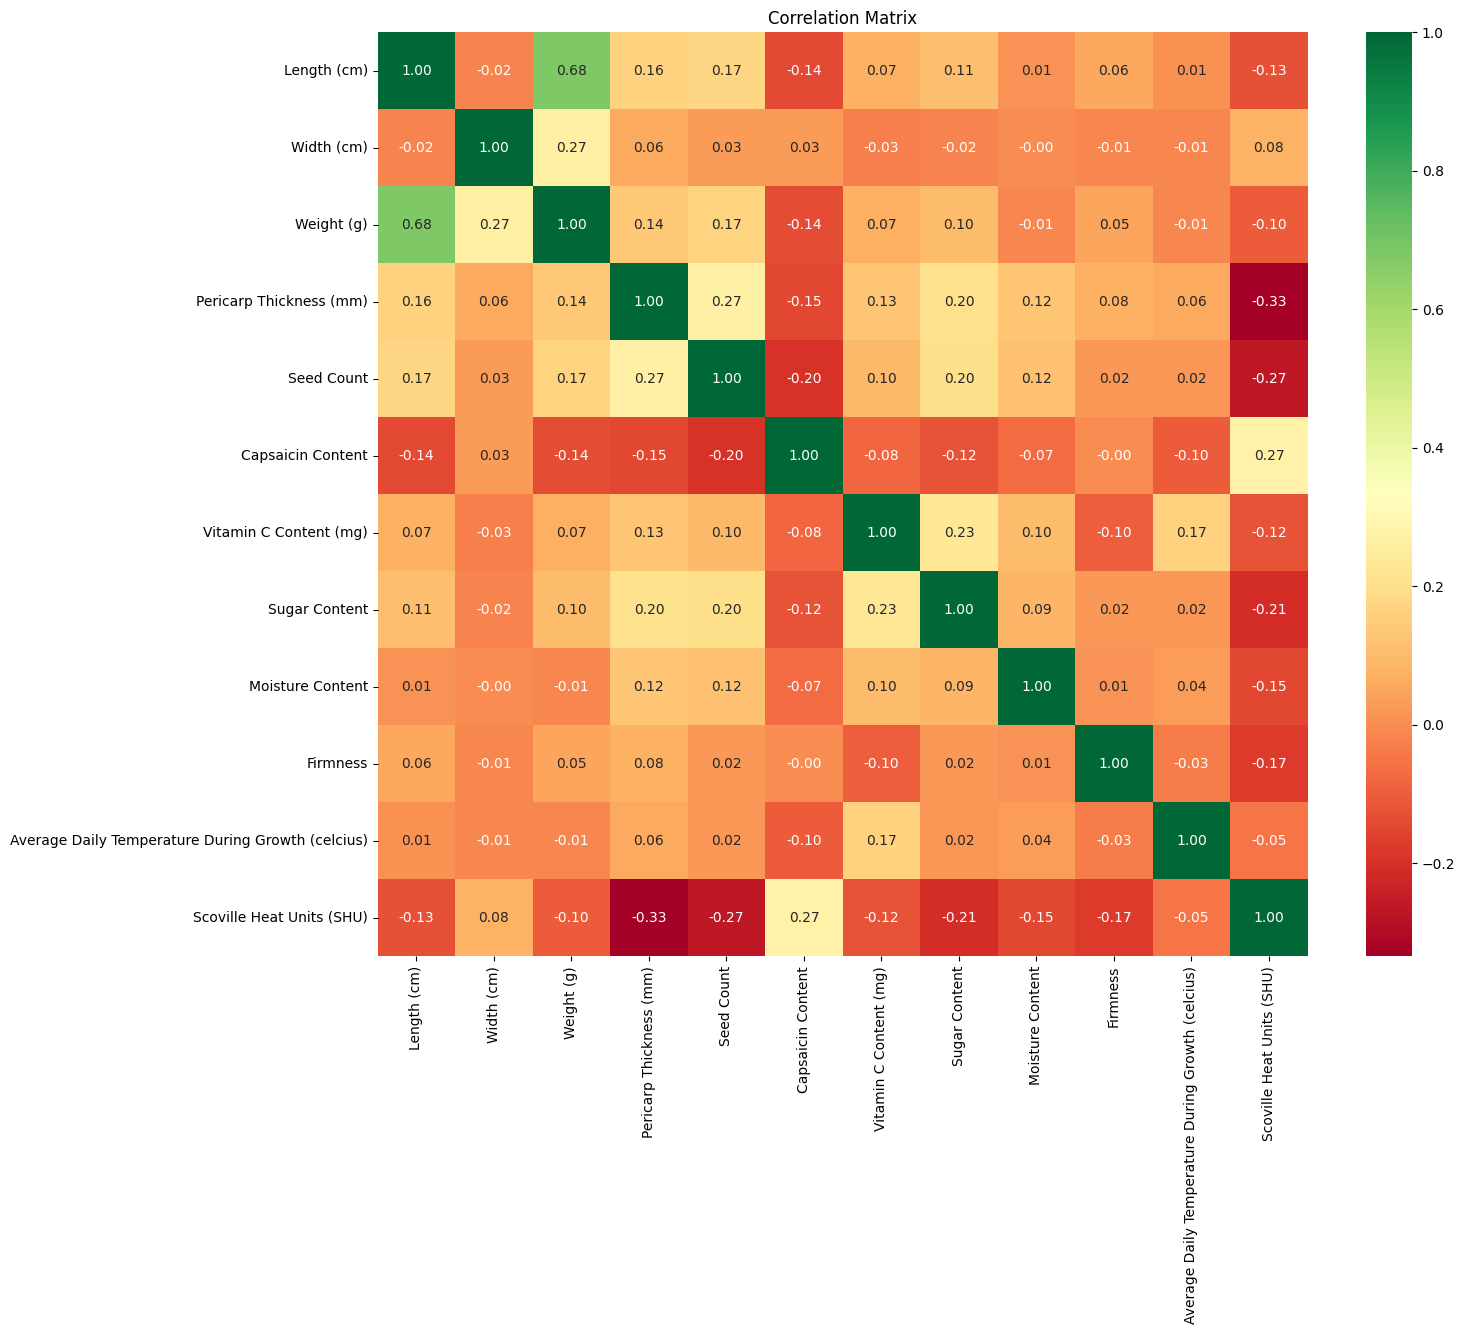

In [195]:
# Correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(preprocessed_df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

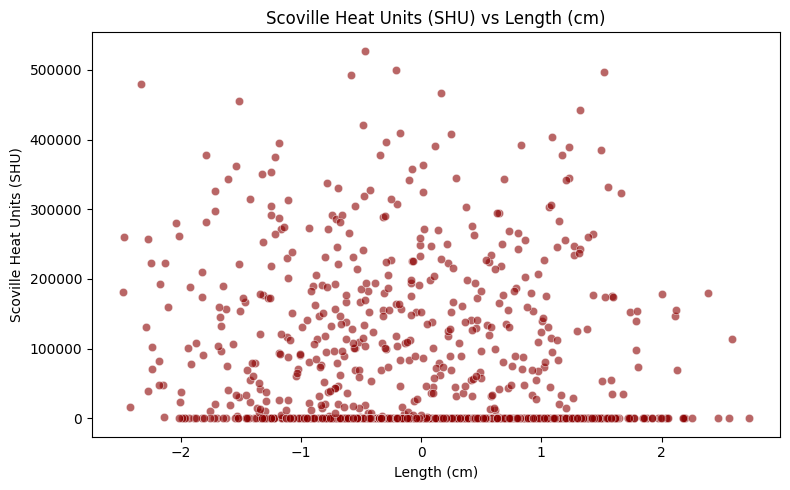

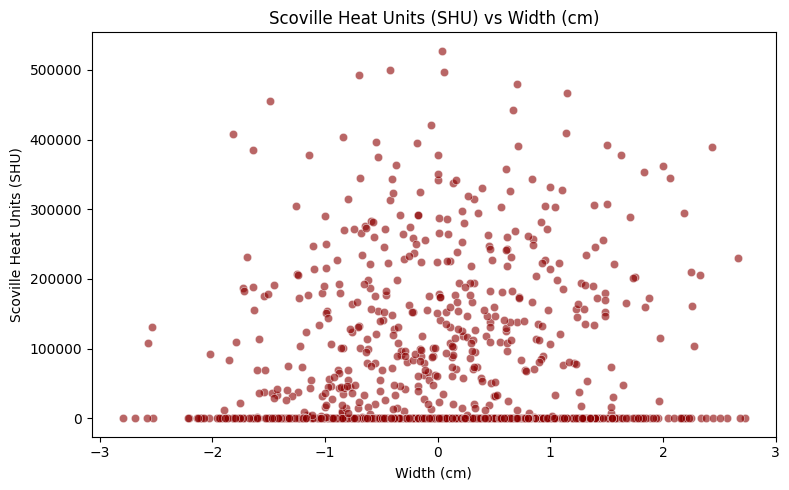

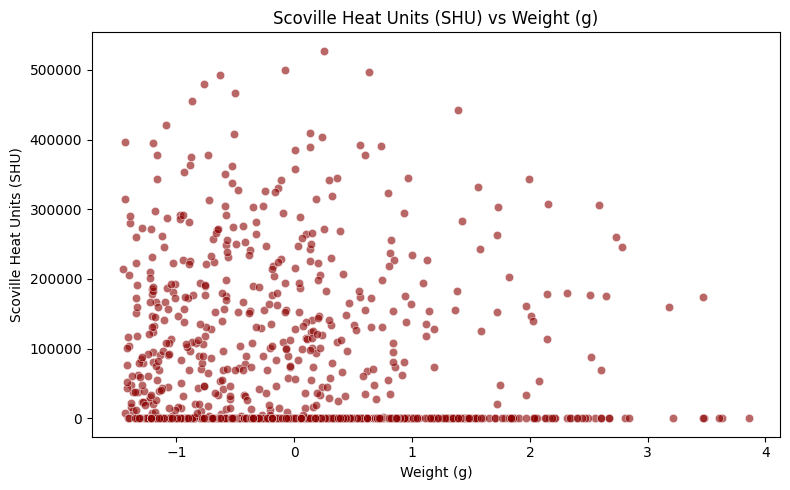

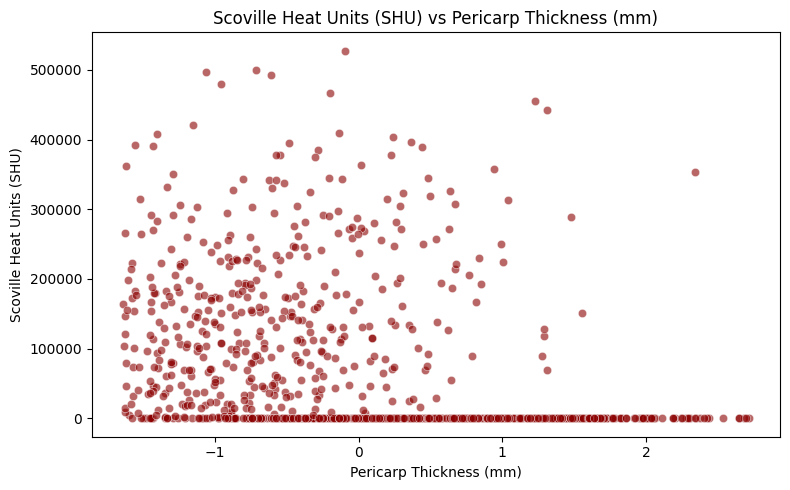

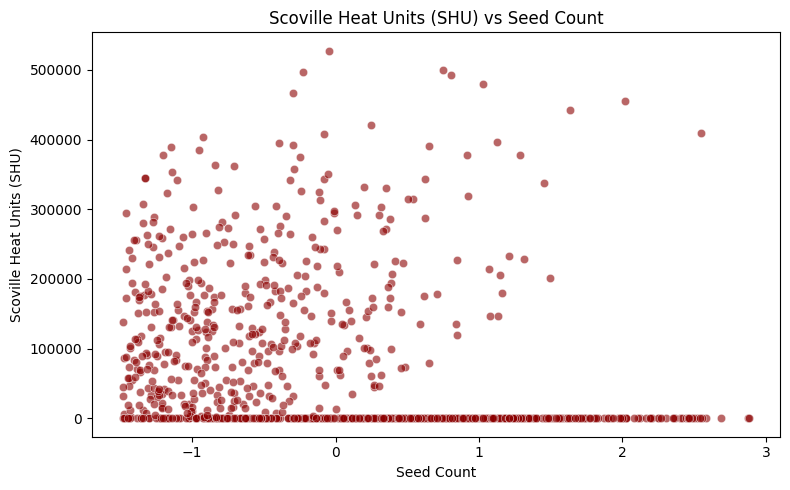

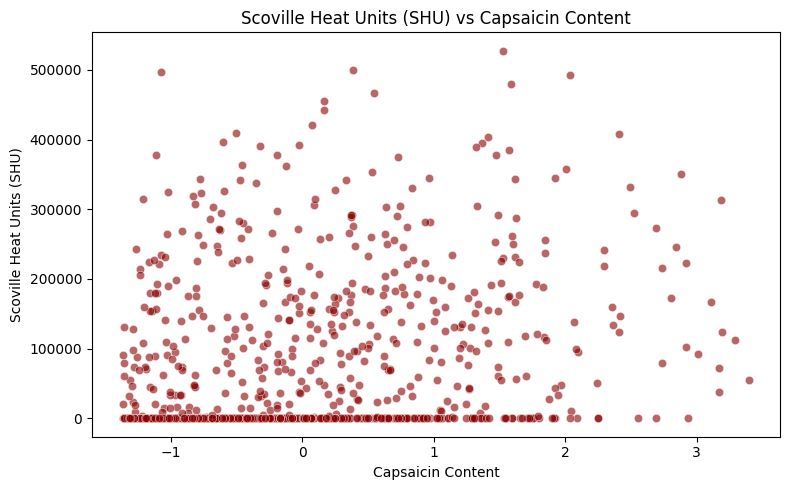

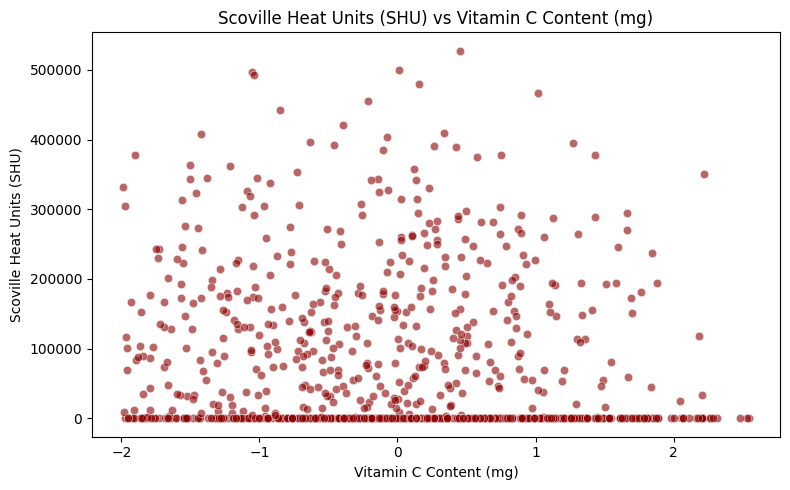

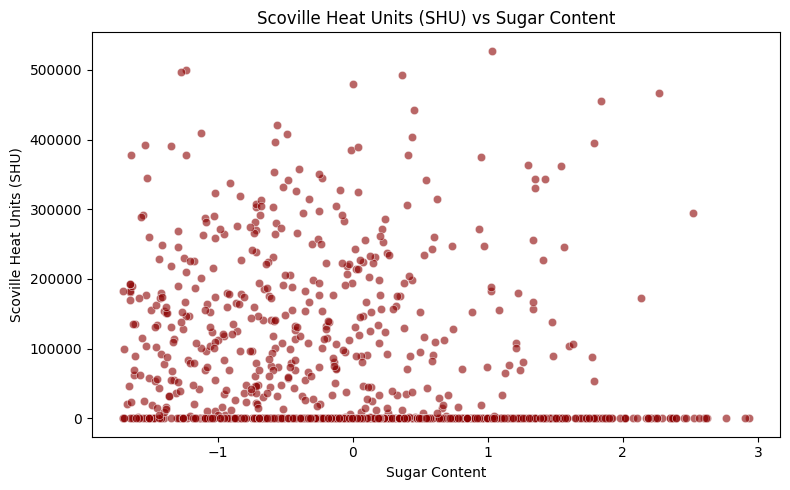

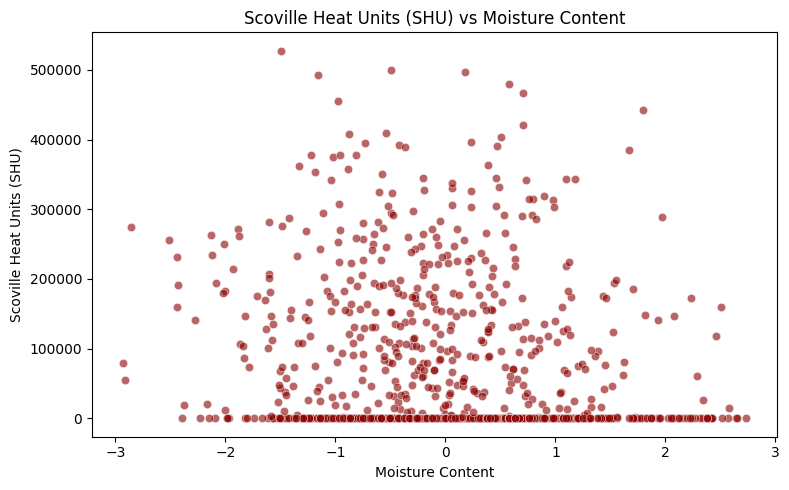

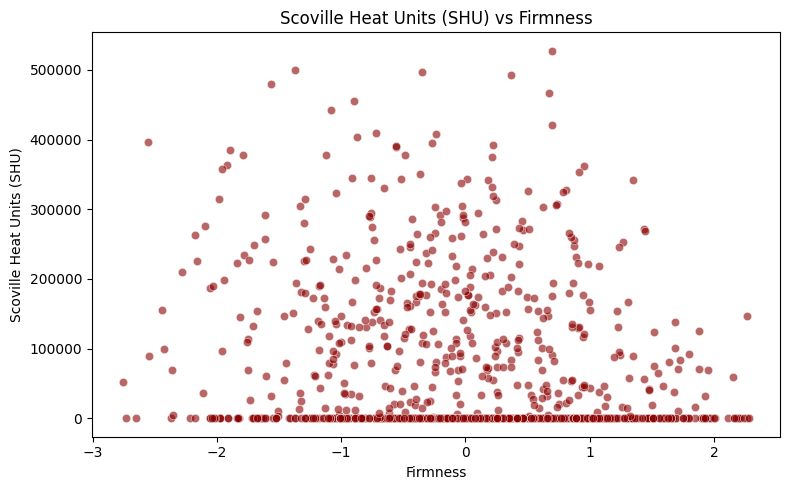

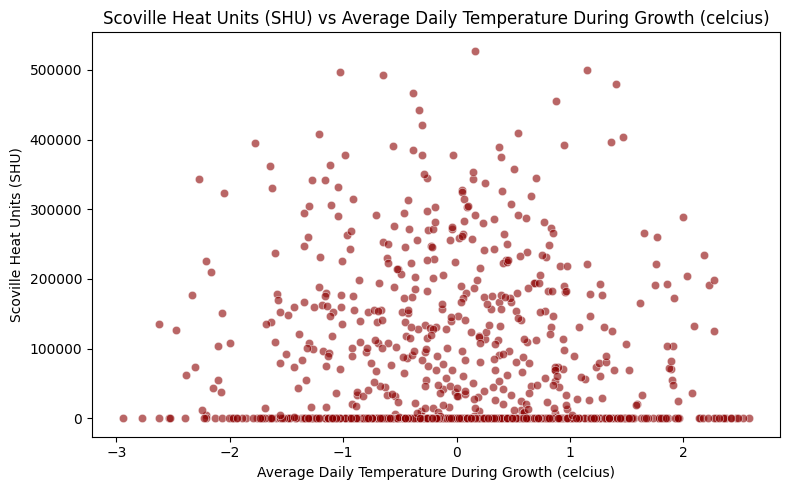

In [197]:
for col in preprocessed_df.drop(target_col, axis = 1).columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
            data=preprocessed_df,
            x=col,
            y=target_col,
            color = 'darkred',
            alpha=0.6)
    plt.title(f'{target_col} vs {col}')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()